# Introduction to Jupyter Notebook/Jupyter Lab
Jupyter notebooks are incredibly powerful tools to test and document your code.  
On top of that, Jupyter lab itself can function as a fully-fledged IDE for python.  
The website https://jupyter.org/try-jupyter/lab/ will have a far better intro and explanation than here.  

For the purposes of this lesson plan, we will go over the main functions of jupyter notebook and make sure that you have the correct jupyter kernel installed to test out the Light-Seq code.  

If you installed anaconda, then jupyter lab is already installed on your computer. You can start it by typing.  

```jupyter lab```  

into your terminal.  

### Your notebook kernel
Each notebook has a kernel which is essentially the environment that will run your code.  
For example, this notebooks kernel is the basic python3 kernel that should have been installed when you installed anaconda  
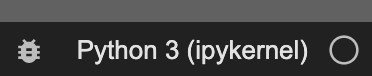  

To test out the scripts for the Light-Seq pipeline, make sure that you can see "LSEnv" as the selected kernel when you run the Light-Seq code.  
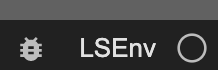  


#### Notebook "cells"
This is a Markdown cell, which means you can use latex to write equations like this: $\sum x_i$    
Or like this:  

$$
\begin{aligned}
E & = mc^2 \\
E & =\oint\sum_{i=0}^\infty \frac{i}{0} \pi \alpha + mc^{huh?} - \ln{2}\\
\end{aligned}
$$

In [1]:
# This is a code cell, where you can test all of your python code
print("Hello")

Hello


In [2]:
#We will be importing several packages required to run the Light-Seq code
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This is where you need to make sure that you are using the correct jupyter kernel
# If we try to import a package that is in the "LSEnv" while using the "python3" kernel
# We will get an error
import pysam

ModuleNotFoundError: No module named 'pysam'

In [4]:
# We can use packages as we would normally
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# Or write loops
for idx in range(5):
    print(idx)
    if idx>3:
        print("We've past the number 3")

0
1
2
3
4
We've past the number 3


In [6]:
# Or even write functions in here
def simple_function(var1, var2):
    print('You entered %s for var1' % var1)
    print('You entered %s for var2' % var2)
    
    return var1, var2
    

In [7]:
simple_function('varONE',46)

You entered varONE for var1
You entered 46 for var2


('varONE', 46)

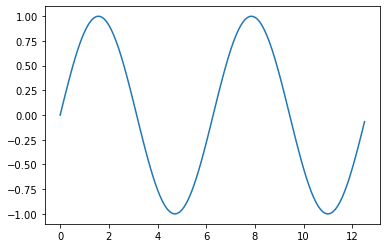

In [8]:
# But most importantly, we can plot tables and figures in cells and revisit them later.
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
plt.plot(x,y)
plt.show()

### Jupyter notebook magic functions

In [9]:
#Look at your current namespace
%whos

Variable          Type             Data/Info
--------------------------------------------
NamespaceMagics   MetaHasTraits    <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
get_ipython       function         <function get_ipython at 0x1049e9170>
idx               int              4
json              module           <module 'json' from '/opt<...>hon3.7/json/__init__.py'>
np                module           <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
os                module           <module 'os' from '/opt/a<...>da3/lib/python3.7/os.py'>
plt               module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
simple_function   function         <function simple_function at 0x10d6c80e0>
sys               module           <module 'sys' (built-in)>
x                 ndarray          126: 126 elems, type `float64`, 1008 bytes
y                 ndarray          126: 126 elems, type `float64`, 1008 bytes


In [10]:
%%time
#Cell magic functions start with "%%" and must be the first line
#Which is why this cell does not start with this comment
count = 0
for i in range(10000000):
    count +=1
print('Iterated for %s times' % count)

Iterated for 10000000 times
CPU times: user 945 ms, sys: 4.14 ms, total: 949 ms
Wall time: 957 ms


### Command line calls in python
A big part of the Light-Seq pipeline is calling other packages like umi-tools or featurecounts which are all called from the command line in your terminal.  
Calling a package from the command line in a python script can be normally be accomplished by a line of code like this:  

```os.system('umi-tools')```  

However calling a package in jupyter notebook is a bit different.

In [11]:
# For examplee: calling zgrep using os.system will give this 
os.system('zgrep')

usage: zgrep [-abcDEFGHhIiJLlmnOoqRSsUVvwxZ] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]


512

In [12]:
# But If you try to use os.system in a jupyter cell, it wont give an actual output
os.system('zgrep '' inFiles/TLS23A_S1_L001_R1_001.fastq.gz | head')

0

In [13]:
# Instead we will use this line magic function if we want to use the notebook to test out something like zgrep
!zgrep '' inFiles/TLS23A_S1_L001_R1_001.fastq.gz | head

@M01675:146:000000000-JNRMM:1:1101:15250:1474 1:N:0:TAAGGCGA+NTCTCTAT
GAAGGGAGTGTAAGGGTANGAGTTATAGTCTGTCTCTTATACACATCTCCGAGCCCACGAGACTAAGGCGAACCTCGTATGCCGTCTTCTGCTTGAAAAA
+
CCCCCGGGGGGGGGGGGG#=DFGGGGGGGGGGGGGGGGGGGGGGGEFFCAF7FGGGFGDGCEGGGGGGGGGG+@FGG@CGGGGGGGFGGFGGG9ECFF,C
@M01675:146:000000000-JNRMM:1:1101:8789:1476 1:N:0:TAAGGCGA+NTCTCTAT
GAAGGATAGTTTGTTAGGNGAGTTATACGCTGGGAAAAAAAAAAGAGCGAGAGCGCCAGCTATCCTGAGGGAAACTTCGGAGGGAACCAGCTACTAGATG
+
CCCCCFFGGFGGGGGGGG#=6FFGGGGGGGGGGGGGFCFGGGGGEGGGGGGGGGGGGDGGGDEFCGCEFG>:FGGGGGGGEG>CFGGGGGGFGGGFDFGE
@M01675:146:000000000-JNRMM:1:1101:14180:1476 1:N:0:TAAGGCGA+NTCTCTAT
GTGTGTGTAAGGGTTAGGNGAGTTATGTGCTGGGCAGGAAGCTCTCAATGTAGTTCTTGTCCTCCAGCCCCTGTCTCTTATACACATCTCCGAGCCCACG


In [14]:
# Most (probably all) of your familiar terminal commands should work
!zgrep '' inFiles/TLS23A_S1_L001_R1_001.fastq.gz | head > TLS23A_10lines.txt

### Command line calls in Jupyter notebook
Unfortunately even if you have the LSEnv active in jupyter,  
there are still some issues with running third party packages with the "!" magic command.  
Basically you need to install "jupyter lab" into your "LSEnv" and start jupyter lab from there in order for it to see the packages in the environment.  
We dont need to do that today but I will do it for the purposes of this workshop